<a href="https://colab.research.google.com/github/aruntakhur/SitareUniversity/blob/main/DFS_AI_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Depth First Search on the given Graph
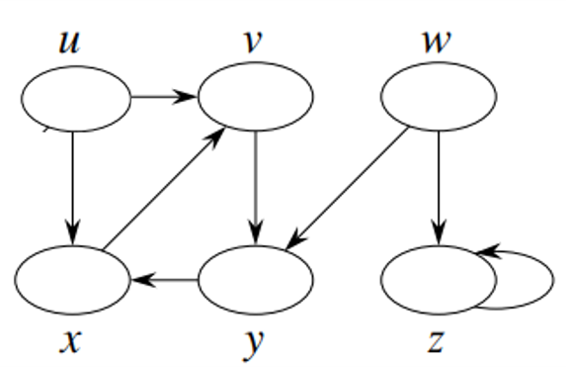

Define the Graph for Depth First Search

In [1]:
graph = {
    'u': ['v', 'x'],
    'v': ['y'],
    'w': ['y', 'z'],
    'x': ['v'],
    'y': ['x'],
    'z': ['z']  # self-loop
}

In [2]:
# Global variables for DFS
time = 0
color = {}
parent = {}
discovery = {}
finish = {}

# Code for Initilization

In [3]:
for u in graph:
        color[u] = "WHITE"   # Unvisited
        parent[u] = None

time = 0
print(color)
print(parent)

{'u': 'WHITE', 'v': 'WHITE', 'w': 'WHITE', 'x': 'WHITE', 'y': 'WHITE', 'z': 'WHITE'}
{'u': None, 'v': None, 'w': None, 'x': None, 'y': None, 'z': None}


#    Runs Depth-First Search on graph G.
###    Initializes all vertices, then calls DFS-VISIT on unvisited ones.

In [4]:
def DFS(G):
    """
    Runs Depth-First Search on graph G.
    Initializes all vertices, then calls DFS-VISIT on unvisited ones.
    """
    global time, color, parent, discovery, finish

    # Initialize all vertices
    for u in G:
        color[u] = "WHITE"   # Unvisited
        parent[u] = None

    time = 0

    # Perform DFS on each unvisited node
    for u in G:
        if color[u] == "WHITE":
            DFS_VISIT(G, u)

# Visits a vertex u in DFS.
###    Tracks discovery time, finish time, and parent relationships.

In [5]:
def DFS_VISIT(G, u):
    """
    Visits a vertex u in DFS.
    Tracks discovery time, finish time, and parent relationships.
    """
    global time, color, parent, discovery, finish

    color[u] = "GRAY"      # Node is discovered but not finished
    time += 1
    discovery[u] = time    # Discovery time

    # Explore neighbors
    for v in G[u]:
        if color[v] == "WHITE":
            parent[v] = u
            DFS_VISIT(G, v)

    color[u] = "BLACK"     # Finished exploring u
    time += 1
    finish[u] = time       # Finish time

# Run Depth First Search Algo

In [6]:
# --- Run DFS ---
DFS(graph)

# --- Print Results ---
print("Discovery Times:", discovery)
print("Finish Times:", finish)
print("Parents:", parent)

Discovery Times: {'u': 1, 'v': 2, 'y': 3, 'x': 4, 'w': 9, 'z': 10}
Finish Times: {'x': 5, 'y': 6, 'v': 7, 'u': 8, 'z': 11, 'w': 12}
Parents: {'u': None, 'v': 'u', 'w': None, 'x': 'y', 'y': 'v', 'z': 'w'}


# Vizualize the Graph

C:\Users\codef\AppData\Local\Temp\ipykernel_20800\1371777621.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(scatterpoints=1)


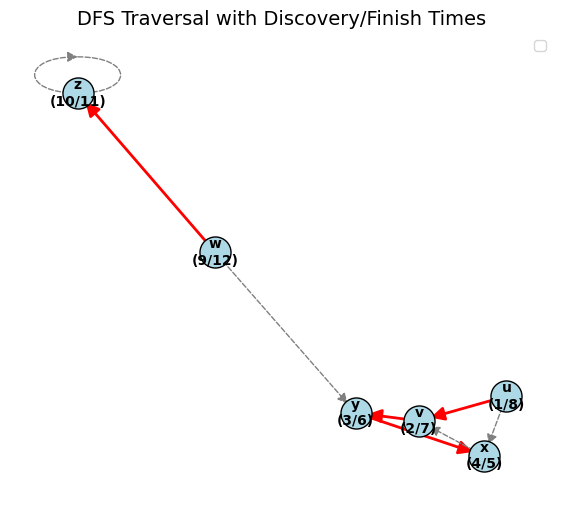

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# --- Build networkx graph ---
G = nx.DiGraph()
for u in graph:
    for v in graph[u]:
        G.add_edge(u, v)

# Positioning
pos = nx.spring_layout(G, seed=42)

# Separate DFS tree edges
tree_edges = [(p, u) for u, p in parent.items() if p is not None]
other_edges = [e for e in G.edges() if e not in tree_edges]

# --- Draw Graph ---
plt.figure(figsize=(7,6))

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=tree_edges, edge_color="red", arrows=True, arrowsize=20, width=2, label="DFS Tree")
nx.draw_networkx_edges(G, pos, edgelist=other_edges, edge_color="gray", style="dashed", arrows=True, arrowsize=15, label="Other Edges")

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=500, edgecolors="black")

# Labels: show d/f times
labels = {u: f"{u}\n({discovery[u]}/{finish[u]})" for u in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight="bold")

plt.title("DFS Traversal with Discovery/Finish Times", fontsize=14)
plt.legend(scatterpoints=1)
plt.axis("off")
plt.show()